## Objective
The main objective of the program is to predict the percentage of an student based on the no. of study hours. The objective has been completed using Python Supervised Machine Learning Linear Regression concept.

## Linear Regression with Python
<p>Linear regression is a statistical approach for modelling relationship between a dependent variable with a given set of independent variables. Simple linear regression is an approach for predicting a response using a single feature. We are going to use the equation <b>'y = a + bx'</b> where <b>'a'</b> is the constant term or the <b>'y'</b> intercept. It is the value of the dependent variable when <b>'x = 0'</b> and
<b>'b'</b> is the coefficient of the independent variable. It is also known as the slope and gives the rate of change of the dependent variable.</p>
<p>Before moving on, we will summarize 2 basic steps of Machine Learning as per below:</p>
<ol>
    <li>
        <b>Training: </b>Training a model simply means learning (determining) good values for all the weights and the bias from labeled examples. In supervised learning, a machine learning algorithm builds a model by examining many examples and attempting to find a model that minimizes loss; this process is called empirical risk minimization.
    </li>
    <li><b>Prediction: </b>Prediction refers to the output of an algorithm after it has been trained on a historical dataset and applied to new data when forecasting the likelihood of a particular outcome, such as whether or not a customer will churn in 30 days.
    </li>
</ol>
<h4>Libraries Used</h4>
<ul>
    <li><b>SKLearn: </b>Scikit-learn is probably the most useful library for machine learning in Python. The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.</li>
    <li><b>Numpy: </b>NumPy is a Python library used for working with arrays. It also has functions for working in domain of linear algebra, fourier transform, and matrices. NumPy was created in 2005 by Travis Oliphant. It is an open source project and you can use it freely. NumPy stands for Numerical Python.</li>
    <li><b>Pandas: </b>Pandas is the most popular python library that is used for data analysis. It provides highly optimized performance with back-end source code is purely written in C or Python. We can analyze data in pandas with: Series.</li>
    <li><b>Matplotlib: </b>matplotlib. pyplot is a collection of command style functions that make matplotlib work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.</li>
</ul>

In [6]:
# Install all required libraries
! pip install numpy pandas matplotlib scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [7]:
# Importing all of the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Importing the dataset
DATA_URL = "http://bit.ly/w-data"
dataset = pd.read_csv(DATA_URL)
print("Data imported successfully.")
dataset.head(10)

Data imported successfully.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Based on the observations we have predict score if a student studies for 9.25 hrs/day. But, before predicting the score let's plot a graph for the dataset.

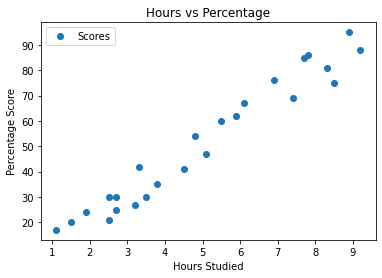

In [9]:
# Plotting the graph
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

<p><b>After plotting all values of the dataset we can see, they all are forming a line, and we can also see that there is a relation between Hours Studied and Percentage Score, that’s why we call it linear.</b></p>

In [10]:
# Preparing the data
x = dataset.iloc[:, :-1].values # exclude last column
y = dataset.iloc[:, 1].values # exclude first column

<h4>Code Explanation</h4>
<ul>
    <li><b>x: </b>the first column which contains Hours Studied</li>
    <li><b>y: </b>the first column which contains Percentage Score</li>
</ul>

In [11]:
# Split our data into two sets, first for training and second for testing.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

<h4>Code Explanation</h4>
<ul>
    <li><b>test_size: </b>As we are splitting our dataset into two parts so this parameter will set the ratio of test set compare to dataset i.e. if we have 60 observations in our dataset then 10 will be assigned to the test set and rest of data will automatically be assigned to train set.</li>
    <li><b>random_state: </b>This is the seed for the random number generator. We can put an instance of the RandomState class as well. If we leave it blank or 0, the RandomState instance used by np.random will be used instead.</li>
</ul>

In [12]:
# Build the Regression Model for training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

<h4>Code Explanation</h4>
<ul>
    <li><b>regressor = LinearRegression(): </b>The training model which will implement Linear Regression.</li>
    <li><b>regressor.fit(x_train, y_train): </b>In this line, we pass the <b>'x_train'</b> which contains value of Hours Studied and <b>'y_train'</b> which contains values of Percentage Score to form up the model. This is the training process.</li>
</ul>

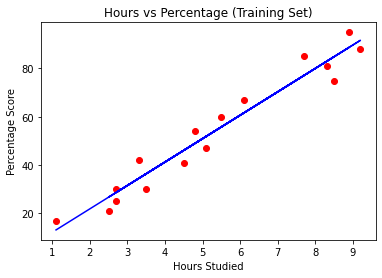

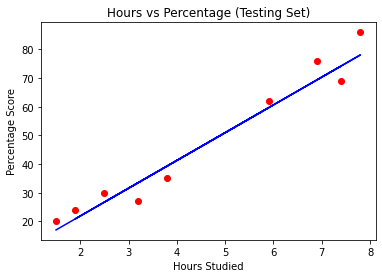

In [13]:
# Visulalize the testing set and training set data
# For that we will create a function first, which can be used to plot the graph
def plot_graph(plotter, x, y, title, x_label, y_label):
    plotter.scatter(x, y, color='red')
    plotter.plot(x, regressor.predict(x), color='blue')
    plotter.title(title)
    plotter.xlabel(x_label)
    plotter.ylabel(y_label)
    plotter.show()

plot_graph(plt, x_train, y_train, 'Hours vs Percentage (Training Set)', 'Hours Studied', 'Percentage Score')
plot_graph(plt, x_test, y_test, 'Hours vs Percentage (Testing Set)', 'Hours Studied', 'Percentage Score')

<p>
    <b>Now as we are ready with the regression model, let's start making predictions.</b>
</p>

In [14]:
from IPython.core.display import display, HTML
predicted_score = regressor.predict(np.array([9.5]).reshape(1, 1))
display(HTML('<p><b>According to the prediction made by the model if a student studies for 9.5 hours then the student can score around ' + str(round(predicted_score[0], 2)) + '</b></p>'))

<h4>Code Explanation</h4>
<ul>
    <li><b>predicted_score = regressor.predict(): </b>The regressor.predict() function expects a 2D array and as we have only single element in the array so we are calling reshape also. </li>
    <li><b>display(): </b>The display function is used here to show some html content to the frontend. The documentation can be found <a href="https://ipython.org/ipython-doc/2/api/generated/IPython.core.display.html" target="_blank">here</a></li>
    <li><b>HTML(): </b>The HTML function is used here to convert the plain HTML string and give that to display function for processing. The documentation can be found <a href="https://ipython.org/ipython-doc/2/api/generated/IPython.core.display.html" target="_blank">here</a></li>
</ul>

In [15]:
%%js
var reqElements = document.querySelectorAll(".jp-OutputArea-child");
for(var x=0; x<reqElements.length; x++){
    if(reqElements[x].hasChildNodes()){
        var thisChilds = reqElements[x].childNodes;
        for(var y=0; y<thisChilds.length; y++){
            if(thisChilds[y].classList.contains("jp-RenderedImage")){
                reqElements[x].style.display = "inline-block";
                reqElements[x].style.marginLeft = "60px";
            }
        }
    }
}

<IPython.core.display.Javascript object>

<h4>Code Explanation</h4>
<ul>
    <li>In the above code we have used %%js built-in cell magic command of IPython. The %%js command is used to run some JavaScript code into the cell.</li>
    <li>The JavaScript code is written to find all of the graphs and display them inline to the previous graph. By default the graphs appear vertically one after another and to chage this and show them vertically inline we are using this JavaScript code.</li>
    <li>A documentation on magic commands can be found <a href="https://ipython.readthedocs.io/en/stable/interactive/magics.html" target="_blank">here</a></li>
</ul>

<h4><b>Author:</b> Shubhangi</h4>